In [1]:

import io
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('carprice.csv')

## **Data** **Preprocessing**



In [2]:
print(df.dtypes,'\n')
print(df.columns,'\n\n\n',df.head(5),'\n\n\n',df.describe(),'\n\n\n')
print(df.isna().sum(),'\n')
cont_col=[]
cate_col=[]
for column in df.columns:
  if len(df[column].unique()) >=10:
    cont_col.append(column)
  else:
    cate_col.append(column)

print(f"{'='*77} \n continuous columns :{cont_col} \n{'='*77} \n categorical columns :{cate_col}")


Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object 

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object') 


   Car_Name  Year  Selling_Price  ...  Seller_Type  Transmission Owner
0     ritz  2014           3.35  ...       Dealer        Manual     0
1      sx4  2013           4.75  ...       Dealer        Manual     0
2     ciaz  2017           7.25  ...       Dealer        Manual     0
3  wagon r  2011           2.85  ...       Dealer        Manual     0
4    swift  2014           4.60  ...       Dealer        Manual     0

[5 rows x 9 columns] 


               Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000

In [3]:
obj=['Car_Name','Fuel_Type','Seller_Type','Transmission']
df[obj]=df[obj].astype('|S25')
print(df.dtypes)
df.head()

Car_Name            |S25
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type           |S25
Seller_Type         |S25
Transmission        |S25
Owner              int64
dtype: object


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,b'ritz',2014,3.35,5.59,27000,b'Petrol',b'Dealer',b'Manual',0
1,b'sx4',2013,4.75,9.54,43000,b'Diesel',b'Dealer',b'Manual',0
2,b'ciaz',2017,7.25,9.85,6900,b'Petrol',b'Dealer',b'Manual',0
3,b'wagon r',2011,2.85,4.15,5200,b'Petrol',b'Dealer',b'Manual',0
4,b'swift',2014,4.60,6.87,42450,b'Diesel',b'Dealer',b'Manual',0


In [4]:
  #The column Car name is a categorical type which went to continuous type so changing it.
  del cont_col[0]

# EDA

In [5]:
for column in df.columns:
  if df[column].dtype=='|S25':
    df[column] = df[column].str.decode('utf-8') 
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


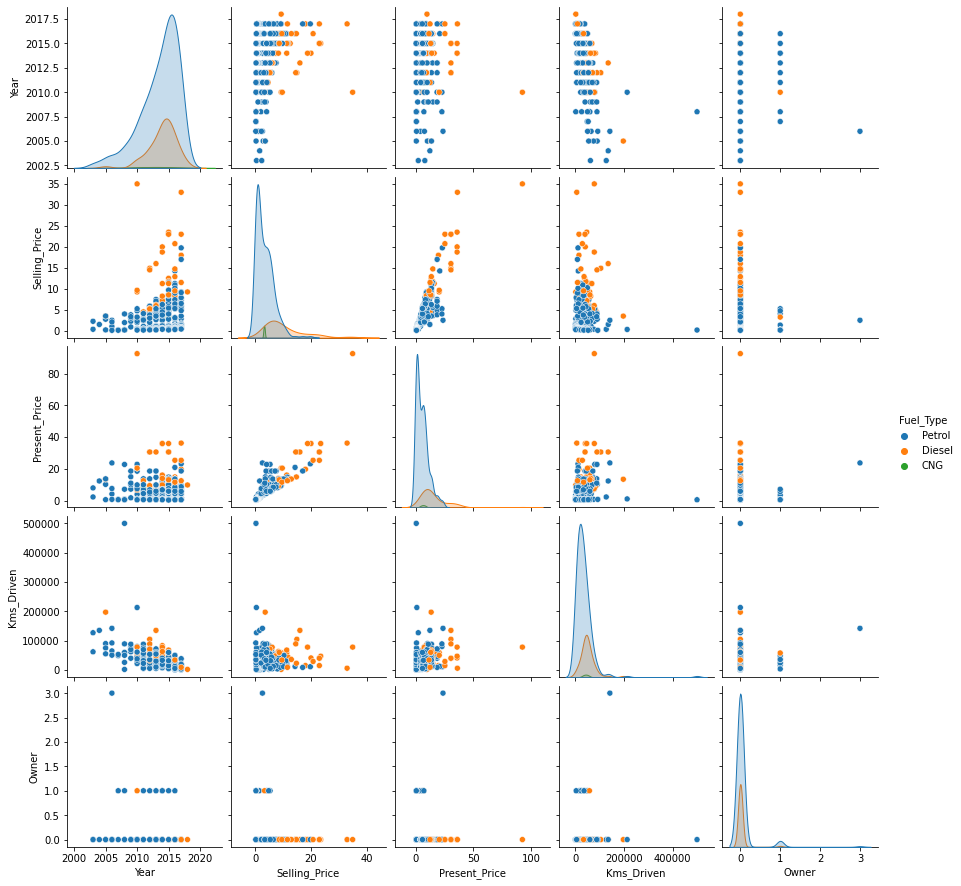

In [6]:
sns.pairplot(df,hue="Fuel_Type")

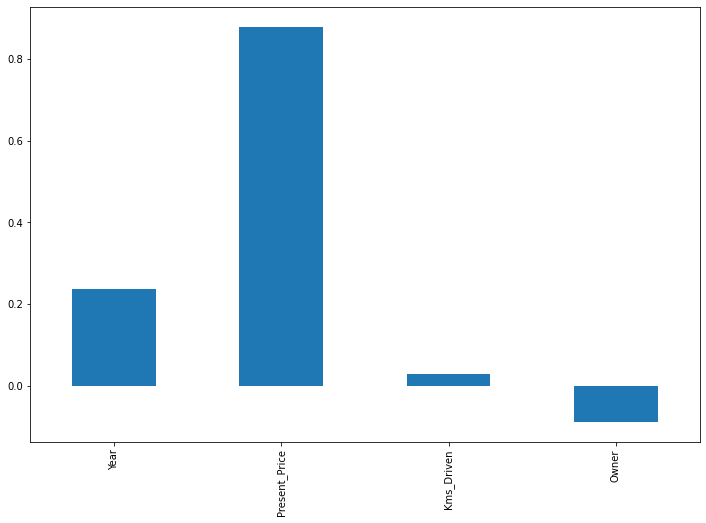

In [7]:
df.drop('Selling_Price',axis=1).corrwith(df['Selling_Price']).plot(kind='bar',figsize=(12,8))

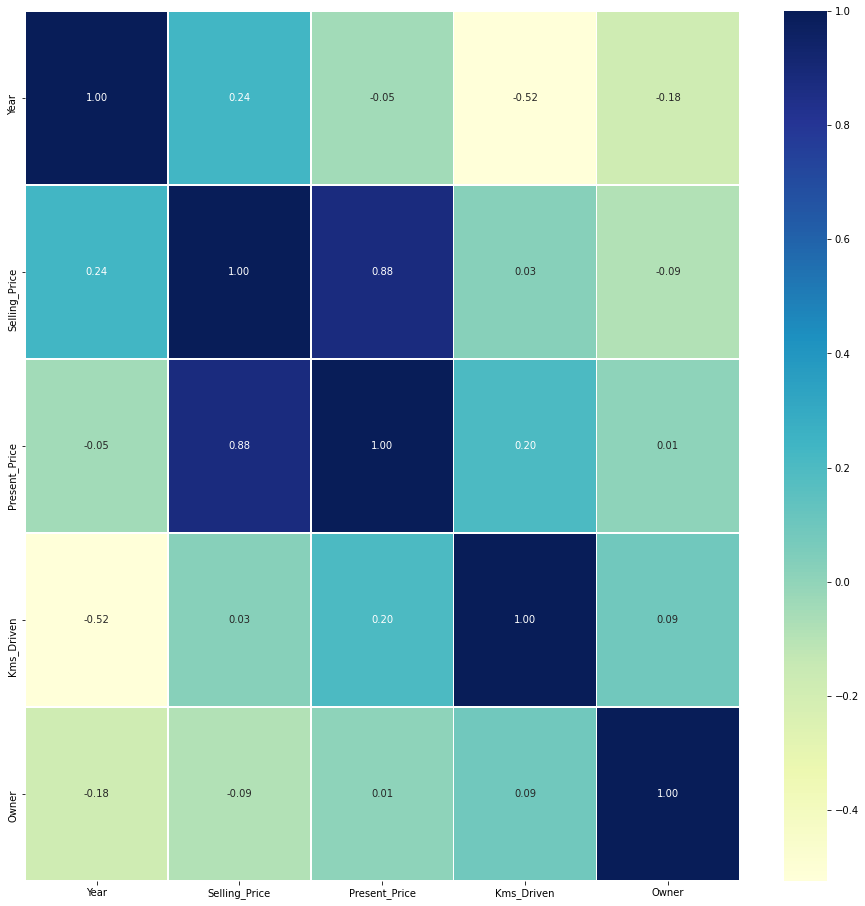

In [8]:
import matplotlib.pyplot as plt

corr_matrix=df.corr()
plt.figure(figsize = (16,16))
ax=sns.heatmap(corr_matrix,
               annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [9]:
##converting categorical data into dummy data
df_cat=pd.get_dummies(df[cate_col])
df_car=pd.get_dummies(df['Car_Name'])
df=df.drop(columns=cate_col)
up_df=pd.concat([df,df_cat],axis=1)
up_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,sx4,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,swift,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1


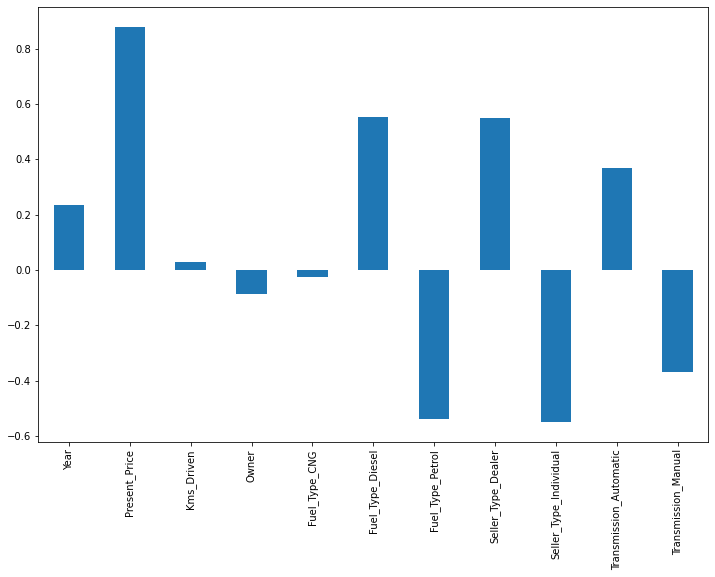

In [10]:
#plotting again for knowing correlation
up_df.drop('Selling_Price',axis=1).corrwith(df['Selling_Price']).plot(kind='bar',figsize=(12,8))

In [11]:
#Will consider only top 10 cars with highest frequency for creating dummy variables and adding it to dataset
freq_car=[]
freq_car.extend(df['Car_Name'].value_counts().index[:10])
df_car=df_car[freq_car]
df_car

,city,corolla altis,verna,fortuner,brio,i20,innova,ciaz,grand i10,amaze
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
296,1,0,0,0,0,0,0,0,0,0
297,0,0,0,0,1,0,0,0,0,0
298,1,0,0,0,0,0,0,0,0,0
299,1,0,0,0,0,0,0,0,0,0


In [12]:
up_df=pd.concat([up_df,df_car],axis=1)
up_df=up_df.drop(columns=['Car_Name'], axis=1)
up_df

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,city,corolla altis,verna,fortuner,brio,i20,innova,ciaz,grand i10,amaze
0,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0
297,2015,4.00,5.90,60000,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
298,2009,3.35,11.00,87934,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0
299,2017,11.50,12.50,9000,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0


In [13]:
up_df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Transmission_Automatic', 'Transmission_Manual', 'city',
       'corolla altis', 'verna', 'fortuner', 'brio', 'i20', 'innova', 'ciaz',
       'grand i10', 'amaze'],
      dtype='object')

# Model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
dep=up_df['Selling_Price']
indep=up_df.loc[:, up_df.columns!='Selling_Price']
tnx,ttx,tny,tty=train_test_split(indep,dep,test_size=0.25)
base=RandomForestRegressor(n_estimators=1500)
base.fit(tnx,tny)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [15]:
#Doing hyperparameter tunning
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
n_estimators = [i*200 for i in range(1,11)]
max_features = ['auto', 'sqrt']
max_depth = [x*10 for x in range(1,11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(ttx, tty)
para=rf_random.best_params_

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.3min finished


In [16]:
from sklearn.metrics import mean_absolute_error
def evalu(model,y_test, x_test):
  pred=model.predict(x_test)
  error=mean_absolute_error(y_test, pred)*100
  accracy=100-error
  print(f'''
  mean absolute percentage error={error}
  accracy = {accracy}
  ''')
  
  return pred


print("Base model")
pred_base=evalu(base,tty,ttx)

print("Best model")
best_random = rf_random.best_estimator_
pred_best=evalu(best_random, tty,ttx)



Base model

  mean absolute percentage error=96.78277192982374
  accracy = 3.2172280701762617
  
Best model

  mean absolute percentage error=57.78874449326254
  accracy = 42.21125550673746
  


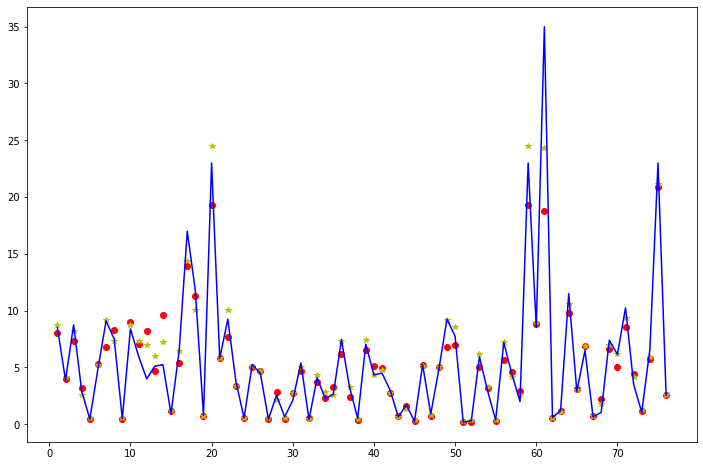

In [17]:
#plot graph of predict and original values
plt.figure(figsize=(12,8))
xpoint=[x for x in range(1,77)]
plt.plot(xpoint,pred_base,'ro', label='Prediction by base')
plt.plot(xpoint,pred_best,'y*', label="Prediction by best")
plt.plot(xpoint,tty,'b-',label='Actual value')
plt.show()

In [18]:
indep.columns

Index(['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Dealer',
       'Seller_Type_Individual', 'Transmission_Automatic',
       'Transmission_Manual', 'city', 'corolla altis', 'verna', 'fortuner',
       'brio', 'i20', 'innova', 'ciaz', 'grand i10', 'amaze'],
      dtype='object')

In [19]:
#pickling the model
import pickle
pkl_file='car_rf.pkl'
with open(pkl_file, 'wb') as file:
  pickle.dump(best_random, file)

# Deployment

In [20]:
!pip install flask_ngrok

In [33]:
import pickle
from flask import Flask,render_template,request,redirect,url_for
from flask_ngrok import run_with_ngrok
app = Flask(__name__ ,template_folder='/')
run_with_ngrok(app)  

pkl_file='car_rf.pkl'
with open(pkl_file,'rb') as file:
  rf=pickle.load(file)

html_label=['year','present','kms','owner','fuel','seller','transmission','car']
car=['city','corolla altis', 'verna', 'fortuner', 'brio', 'innova', 'i20', 'ciaz', 'grand i10',
       'Royal Enfield Classic 350']






@app.route("/")
def home():
  return render_template("/content/index_car.html")



@app.route('/predicts', methods=["GET","POST"])
def predicts():
  detail,car_data=[],[]
  car_matrix=[0 for x in car]
  if request.method=="POST":
    for element in html_label:
      if element in ['year','present','kms','owner']:
        if element=='present':
          detail.append(float(request.form[element]))
        else:
          detail.append(int(request.form[element]))
      else:
        
        if element=='fuel':
          if request.form[element]=='CNG':
            detail.extend([1,0,0])
          elif request.form[element]=='Diesel':
            detail.extend([0,1,0])
          elif request.form[element]=='Petrol':
            detail.extend([0,0,1])
        
        elif element=="seller":
          if request.form[element]=='Dealer':
            detail.extend([1,0])
          elif request.form[element]=='Individual':
            detail.extend([0,1])
        
        elif element=="transmission":
          if request.form[element]=='Automatic':
            detail.extend([1,0])
          elif request.form[element]=='Manual':
            detail.extend([0,1])
          

            
    
    
    if detail[len(detail)-1] in car:
      car_matrix[car.index(detail[len(detail)-1])]=1
    detail=detail[:len(detail)-1]
    detail.extend(car_matrix)

    detail.append(0)
 
    result=rf.predict([detail])[0]
    result=round(result,2)
  return render_template("/content/index_car.html",result=result)



@app.route("/")
def back():
  return render_template("/content/index_car.html")


app.run()



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://80737707c2fd.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [27/May/2021 07:42:05] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [27/May/2021 07:42:06] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [27/May/2021 07:42:23] "POST /predicts HTTP/1.1" 200 -
